<h1>
<font color="#ff2e2e">
Color Space Conversion
</font>
</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> RGB to CMYK </font></h3>

In [3]:
#                    R, G, B
in_color = np.array([50,70,130])
out_color = np.zeros(4)
normalized_color = [channel/255 for channel in in_color]
out_color[3] = 1 - np.max(normalized_color) #K
out_color[0] = 1-normalized_color[0]-out_color[3] #C 
out_color[1] = 1-normalized_color[1]-out_color[3] #M
out_color[2] = 1-normalized_color[2]-out_color[3] #Y
print(out_color)


[0.31372549 0.23529412 0.         0.49019608]


<h3><font color = "#079e05"> BGR to YCbCr </font></h3>

In [4]:
def convert_to_ycbcr(image):
    '''
    Converts the color space of the input image to the YCbCr color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    result = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
    return result

<h3><font color = "#079e05"> BGR to HSV </font></h3>

In [5]:
def convert_to_hsv(image):
    '''
    Converts the color space of the input image to the HSV color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    result = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

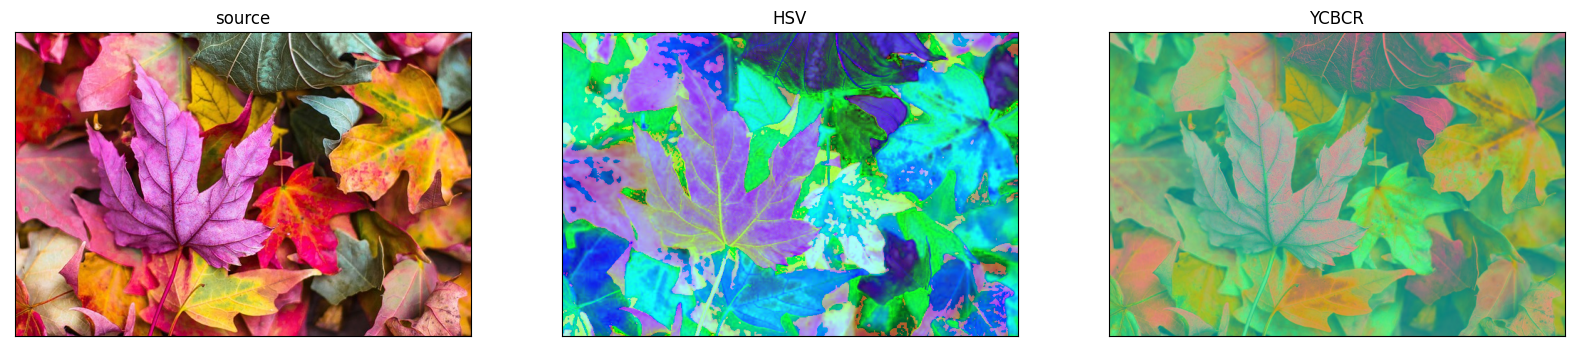

In [6]:
image_list = []
image = cv2.imread(os.path.join('images/Q1', '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([convert_to_hsv(image), 'HSV', 'img'])
image_list.append([convert_to_ycbcr(image), 'YCBCR', 'img'])
plotter(image_list,1 , 3, True, 20, 10, '2A')

<h3><font color = "#079e05"> Split into H, S, V channels </font></h3>

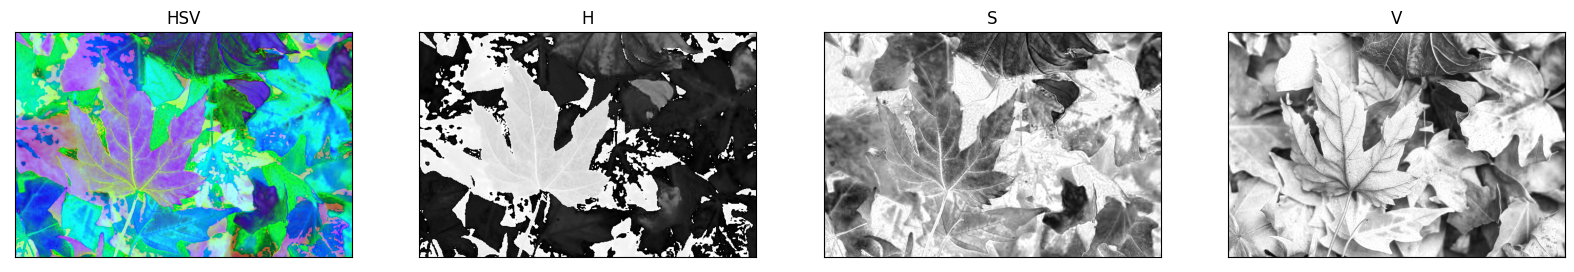

In [7]:
image_list = []
image = cv2.imread(os.path.join('images/Q1', '1.jpg'))
hsv_image = convert_to_hsv(image)
image_list.append([hsv_image, 'HSV', 'img'])
image_list.append([hsv_image[:,:,0], 'H', 'img'])
image_list.append([hsv_image[:,:,1], 'S', 'img'])
image_list.append([hsv_image[:,:,2], 'V', 'img'])
plotter(image_list,1 , 4, True, 20, 10, '2C')

<h1>
<font color="#ff2e2e">
Finding Differences
</font>
</h1>

In [8]:
def dif(image1, image2):
    '''
    Creates a new image that differences between two input images are shown.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result difference image.
    '''
    # initial result array with minimum width and height of two inputs
    min_d1 = min(image1.shape[0],image2.shape[0])
    min_d2 = min(image1.shape[1],image2.shape[1])
    shape = (min_d1,min_d2, 3)
    result = np.zeros(shape=shape, dtype=np.uint8)
    
    # image1 in two channels and image2 in one channel to
    # make a gray-scale image with colorful spots
    result[:,:,0] = image1[:min_d1,:min_d2]
    result[:,:,1] = image1[:min_d1,:min_d2]
    result[:,:,2] = image2[:min_d1,:min_d2]

    
    return result

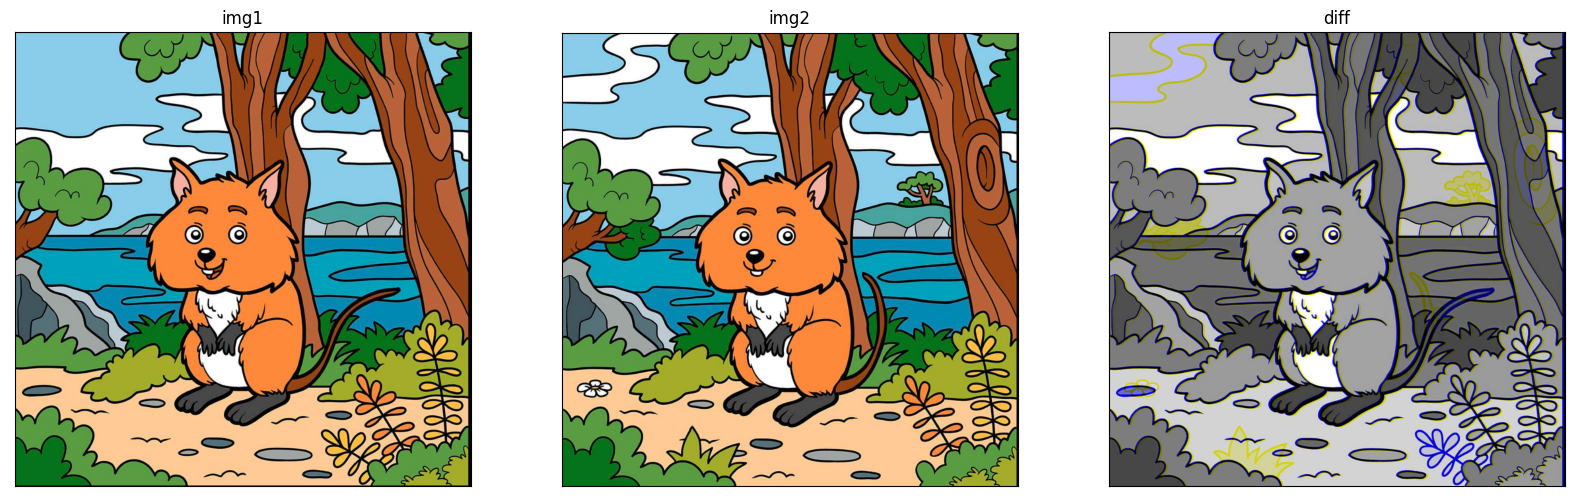

In [9]:
image_list = []

image1 = cv2.imread(os.path.join('images/Q1', '2.png'))
image_list.append([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), 'img1', 'img'])
image2 = cv2.imread(os.path.join('images/Q1', '3.png'))
image_list.append([cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), 'img2', 'img'])

image1 = cv2.imread(os.path.join('images/Q1', '2.png'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join('images/Q1', '3.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([dif(image1, image2), 'diff', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2B')